In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('powerlifting2.csv')
df

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Glossbrenner,IPFPoints,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetName
0,Tucker Sanders,M,B,Single-ply,15.0,13-15,14-18,Teen 14-15,52.00,52,...,82.14,489.70,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ronnie Coleman Classic
1,Xander Womack,M,B,Single-ply,14.0,13-15,14-18,Teen 14-15,100.00,100,...,94.46,474.29,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ronnie Coleman Classic
2,Michael Womack III,M,B,Single-ply,16.0,16-17,NaN,Teen 16-17,67.50,67.5,...,82.33,464.78,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ronnie Coleman Classic
3,Logan McCurley,M,B,Single-ply,16.0,16-17,14-18,Teen 16-17,75.00,75,...,80.90,451.47,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ronnie Coleman Classic
4,Emily Jondron,F,B,Single-ply,21.0,20-23,NaN,Juniors 20-25,90.00,90,...,120.17,671.39,NaN,USA,USABPA,NaN,2019-04-06,USA,TX,Ronnie Coleman Classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861531,Zaden Jones,M,SBD,Wraps,12.0,5-12,NaN,youth,86.18,90,...,120.76,128.96,Yes,USA,NASA,NaN,2019-04-13,USA,OH,Ohio State
1861532,Pablo Nunez,M,SBD,Raw,NaN,24-34,24-39,int,80.29,82.5,...,406.84,633.60,Yes,USA,NASA,NaN,2019-04-13,USA,OH,Ohio State
1861533,Jim Harper,M,BD,Raw,NaN,NaN,NaN,mp,96.16,100,...,178.91,NaN,Yes,USA,NASA,NaN,2019-04-13,USA,OH,Ohio State
1861534,Devin Deer,M,BD,Raw,NaN,NaN,NaN,so,137.89,140,...,83.94,NaN,Yes,USA,NASA,NaN,2019-04-13,USA,OH,Ohio State


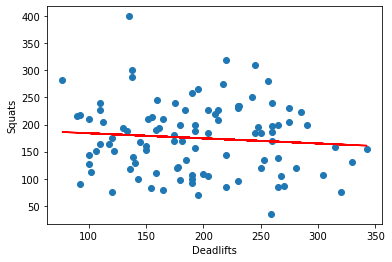

In [14]:
# MATPLOTLIB TESTING

# Transitioning newDf to subset numpy arrays

squat = df['Best3SquatKg'].dropna().sample(n=100)
dead = df['Best3DeadliftKg'].dropna().sample(n=100)

x = dead.to_numpy()
y = squat.to_numpy()

# Plotting and labelling axes

plt.plot(x,y,'o')
plt.xlabel('Deadlifts')
plt.ylabel('Squats')

# Creating trendline

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r-')

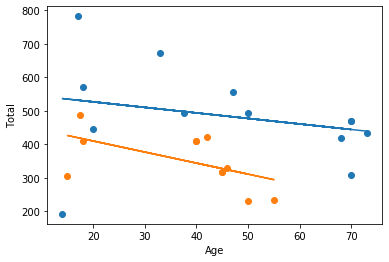

In [19]:
# Graph with average performance differences between men and women
# as scatter with trendline

male = df[df['Sex']=='M'].dropna()
female = df[df['Sex']=='F'].dropna()
maleTot = male['TotalKg']
femaleTot = female['TotalKg']
maleAge = male['Age']
femaleAge = female['Age']

x1 = maleAge.to_numpy()
y1 = maleTot.to_numpy()
x2 = femaleAge.to_numpy()
y2 = femaleTot.to_numpy()

plt.scatter(x1,y1)
plt.scatter(x2,y2)

plt.xlabel('Age')
plt.ylabel('Total')

z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1))

z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2))

plt.show()

# Try to include ALL data binned reflected by the size of each
# scatter dot where total is equal

<BarContainer object of 2 artists>

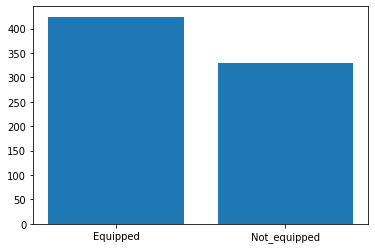

In [50]:
# Categorical plotting of average total onequiped lift 
# vs. non-equipped lift

types = ['Equipped','Not_equipped']

eq = df[df['Equipment']!='Raw']['TotalKg'].mean()
noEq = df[df['Equipment']=='Raw']['TotalKg'].mean()

values = [eq,noEq]

plt.bar(types,values)